In [9]:
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# A function to make the simple SI step. Loop over
# all neighbors of nodes in I and transition them
# to I with probability beta.
def si(G, infected_nodes, beta, vaccinated=[]):
   new_infected = infected_nodes.copy()
   vulnerable_neighbors_of_infected = {n for infected_node in infected_nodes for n in G.neighbors(infected_node)} # Typeof = set
   # vulnerable_neighbors_of_infected = [n for infected_node in infected_nodes for n in G.neighbors(infected_node)] # Typeof = list
   # vulnerable_neighbors_of_infected = []
   # for infected_node in infected_nodes:
   #    for n in G.neighbors(infected_node):
   #       vulnerable_neighbors_of_infected.append(n)
   for vulnerable_node in vulnerable_neighbors_of_infected:
      if random.random() < beta and vulnerable_node not in vaccinated:
         new_infected.add(vulnerable_node)
   return new_infected

In [11]:
# Load the data
df = pd.read_csv('./network.csv/edges.csv', usecols=['source', 'target'])
dfNodes = pd.read_csv('./network.csv/nodes.csv', usecols=['name', 'SEX'])
G = nx.Graph()

sourceList = df['source'].tolist()
targetList = df['target'].tolist()
# sexList = df['sex'].tolist()
added = []
for i in range(len(sourceList)):
    G.add_edges_from([(sourceList[i], targetList[i])])
    added.append((sourceList[i], targetList[i]))

nameList = dfNodes['name'].tolist()
sexList = dfNodes['SEX'].tolist()

for i in range(len(nameList)):
    G.add_nodes_from([
    (nameList[i], {"sex": sexList[i]})
])

largest_cc = max(nx.connected_components(G), key=len)
Gcc = G.subgraph(largest_cc)

sex = nx.get_node_attributes(Gcc, "sex")
sex = list(sex.values())
print(f'Number of males: {sex.count(0)}')
print(f'Number of females: {sex.count(1)}')
print(len(Gcc.nodes))

Number of males: 11340
Number of females: 11471
26706


# Infection time

## Choosing starting nodes randomly

In [12]:
def si(G, infected_nodes, beta, vaccinated=[]):
   new_infected = infected_nodes.copy()
   vulnerable_neighbors_of_infected = {n for infected_node in infected_nodes for n in G.neighbors(infected_node)} # Typeof = set
   for vulnerable_node in vulnerable_neighbors_of_infected:
      if random.random() < beta and vulnerable_node not in vaccinated:
         new_infected.add(vulnerable_node)
   return new_infected

# Run the model for different beta values = spreading rates
for beta in (0.05, 0.1, 0.2):
   # Run it 10 times for each beta value
   ts_to_infect = []
   for _ in range(10):
      # Pick the initial infected set
      i_nodes = set(random.sample(sorted(set(Gcc.nodes)), 1))
      # Run until we infected the entire network
      t = 0
      while (len(i_nodes) / len(Gcc.nodes)) < 0.8:
         i_nodes = si(Gcc, i_nodes, beta)
         t += 1
      ts_to_infect.append(t)
   print("Beta = %1.2f, avg steps to 80%% infection: %1.2f days." % (beta, sum(ts_to_infect) / len(ts_to_infect)))

Beta = 0.05, avg steps to 80% infection: 104.30 days.
Beta = 0.10, avg steps to 80% infection: 52.40 days.
Beta = 0.20, avg steps to 80% infection: 23.80 days.


Beta = 0.10, avg steps to 80% infection: 46.00 days.


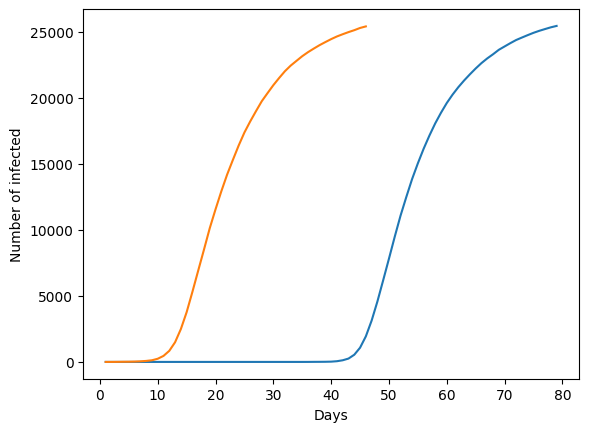

In [20]:
def si(G, infected_nodes, beta, vaccinated=[]):
   new_infected = infected_nodes.copy()
   vulnerable_neighbors_of_infected = []
   for infected_node in infected_nodes:
      for n in G.neighbors(infected_node):
         vulnerable_neighbors_of_infected.append(n)
   for vulnerable_node in vulnerable_neighbors_of_infected:
      if random.random() < beta and vulnerable_node not in vaccinated:
         new_infected.add(vulnerable_node)
   return new_infected

# Run the model for different beta values = spreading rates
time = []
numberOfInfected = []
timeVaccination = []
numberOfInfectedVaccination = []
# for beta in (0.05, 0.1, 0.2):
beta=0.1
# Run it 10 times for each beta value
ts_to_infect = []
# for _ in range(5):
   # Pick the initial infected set
i_nodes = set(random.sample(sorted(set(Gcc.nodes)), 1))
infectedvaccination_nodes = set(random.sample(sorted(set(Gcc.nodes)), 1))
# Run until we infected the network
t = 0
while (len(i_nodes) / len(Gcc.nodes)) < 0.95:
   i_nodes = si(Gcc, i_nodes, beta)
   t += 1
   time.append(t)
   numberOfInfected.append(len(i_nodes))
t = 0
while (len(infectedvaccination_nodes) / len(Gcc.nodes)) < 0.95:
      infectedvaccination_nodes = si(Gcc, infectedvaccination_nodes, beta, [list(Gcc.nodes)[list(Gcc.nodes).index(800)],list(Gcc.nodes)[list(Gcc.nodes).index(289)],list(Gcc.nodes)[list(Gcc.nodes).index(0)]])
      t += 1
      timeVaccination.append(t)
      numberOfInfectedVaccination.append(len(infectedvaccination_nodes))
ts_to_infect.append(t)
print("Beta = %1.2f, avg steps to 80%% infection: %1.2f days." % (beta, sum(ts_to_infect) / len(ts_to_infect)))


plt.plot(time,numberOfInfected)
plt.plot(timeVaccination,numberOfInfectedVaccination)
plt.ylabel('Number of infected') # should be changed to % of infectable, since we will introduce vaccination later on.
plt.xlabel('Days')
plt.show()

## Choosing the node with the highest degree

In [14]:
# Let's try to deliberately choose the hubs
# Node #800 has the highest degree, we choose that one
# Run the model for different beta values = spreading rates
for beta in (0.05, 0.1, 0.2):
   # Run it 10 times for each beta value
   ts_to_infect = []
   for _ in range(10):
      # Pick the initial infected set
      i_nodes = set([list(Gcc.nodes)[list(Gcc.nodes).index(800)]])
      # Run until we infected the entire network
      t = 0
      while (len(i_nodes) / len(Gcc.nodes)) < 0.8:
         i_nodes = si(Gcc, i_nodes, beta)
         t += 1
      ts_to_infect.append(t)
   print("Beta = %1.2f, avg steps to 80%% infection: %1.2f days." % (beta, sum(ts_to_infect) / len(ts_to_infect)))

Beta = 0.05, avg steps to 80% infection: 45.90 days.
Beta = 0.10, avg steps to 80% infection: 24.20 days.
Beta = 0.20, avg steps to 80% infection: 13.40 days.


# Let's introduce vaccination

## Vaccinate the hub, spread randomly

In [15]:
# Let's try to vaccinate some nodes

# Run the model for different beta values = spreading rates
for beta in (0.05, 0.1, 0.2):
   # Run it 10 times for each beta value
   ts_to_infect = []
   for _ in range(10):
      # Pick the initial infected set
      i_nodes = set(random.sample(sorted(set(Gcc.nodes)), 1))
      # Run until we infected the entire network
      t = 0
      while (len(i_nodes) / len(Gcc.nodes)) < 0.8:
         i_nodes = si(Gcc, i_nodes, beta, [list(Gcc.nodes)[list(Gcc.nodes).index(800)],list(Gcc.nodes)[list(Gcc.nodes).index(289)],list(Gcc.nodes)[list(Gcc.nodes).index(0)]])
         t += 1
      ts_to_infect.append(t)
   print("Beta = %1.2f, avg steps to 80%% infection: %1.2f days." % (beta, sum(ts_to_infect) / len(ts_to_infect)))

Beta = 0.05, avg steps to 80% infection: 70.80 days.
Beta = 0.10, avg steps to 80% infection: 34.20 days.
Beta = 0.20, avg steps to 80% infection: 21.30 days.


## Vaccinate 3 males

In [16]:
# Let's try to vaccinate some nodes

## Vaccinate 3 females

In [17]:
# Let's try to vaccinate some nodes